c:\Users\Jose Amorocho\OneDrive\Documentos\SAM_Pyhton\Processing.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['TimeStamp'] = time
c:\Users\Jose Amorocho\OneDrive\Documentos\SAM_Pyhton\Processing.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var.iloc[drv[f]:drv[(f)+1]] = - \


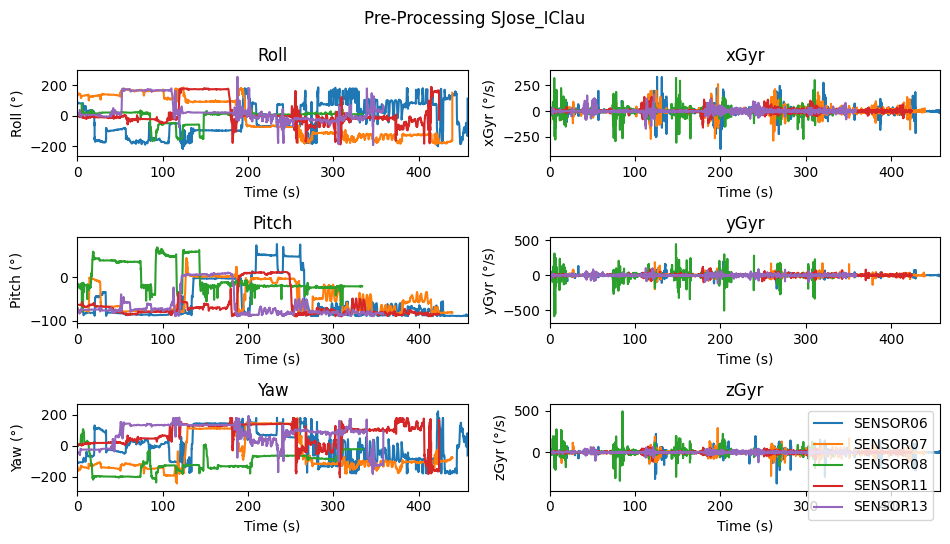

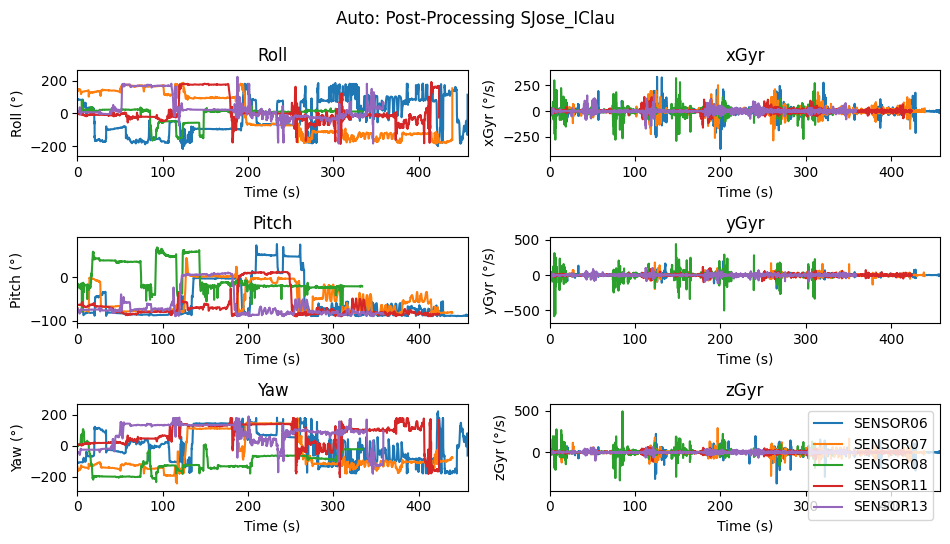

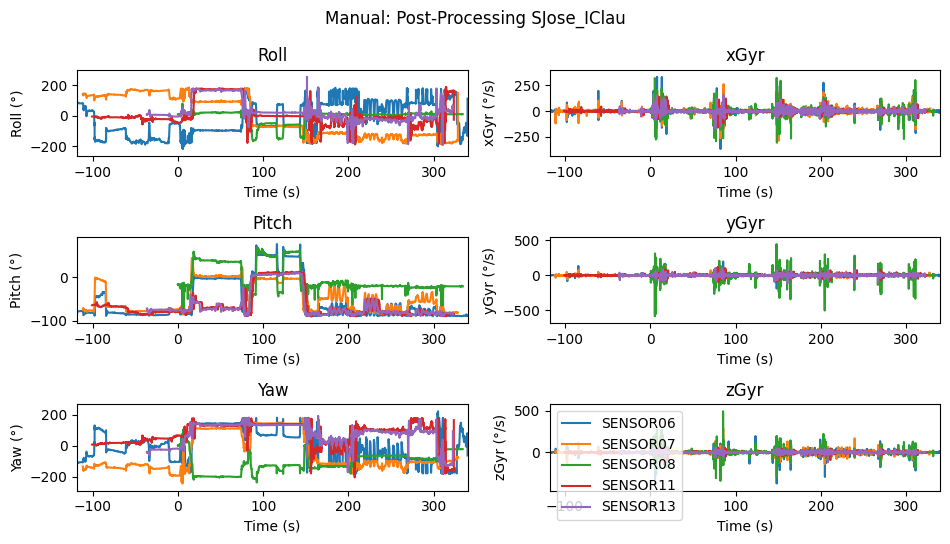

In [9]:
#from Angles_Determination import Angles_Ankle, Angles_Hip, Angles_Knee
from Load_Files import Load_Files
from Processing import Change_Range, Plot_Data, Resample, Same_size, Set_Data, Syncronize,timeMove
import copy
test= 'SJose_IClau' 
dia = 'Dia_1'
dir= "./2022_10_18/"+dia+'/'+test+'/'
# Load the data
data= Load_Files(dir)
# Set Start to 0 Sensors(SAM).
data= Set_Data(data)
# Adjust angles range to a continous angles.
data= Change_Range(data,150)
# Oversample the data to 200 Hz.
data= Resample(data,200)

# Plot the data
Plot_Data(data,test,'Pre-Processing')
data_a = copy.deepcopy(data)
# Synchronize the data.
data_a= Syncronize(data)


data_m = copy.deepcopy(data)
if test == 'SJose_IClau':
    if dia == 'Dia_1':
        syn= [-117.9,-111.385,0,-100.577,-36.335] # 1 SJose_IClau
    if dia == 'Dia_2':
        syn= [-14,-20,-23,-6,0] # 2 SJose_IClau
if test == 'SJose_INat':
    if dia == 'Dia_1':
        syn= [-117.9,-111.385,0,-100.577,-36.335] # 1 SJose_INat
    if dia == 'Dia_2':
        syn= [0,-18.63,-6.595,-24.6,-22.67] # 2 SJose_INat 
n = list(data_m.keys())
for i in range(0,len(n)):
    data_m[n[i]]= timeMove(data_m[n[i]],syn[i])

# Resample the data to 50 Hz.
data_a= Resample(data_a,50)
# Resample the data to 50 Hz.
#data_m= Resample(data_m,50)

Plot_Data(data_a,test,'Auto: Post-Processing')
Plot_Data(data_m,test,'Manual: Post-Processing')
